In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot,axis,show,pcolor,colorbar,bone
%matplotlib inline
import numpy as np
import pandas as pd
from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from minisom import MiniSom

In [2]:
#Read data set

original_data = pd.read_csv('./data/forestfires.csv')
print(original_data.shape)
original_data.head()

(517, 13)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
# Replace text attributes with integers.

month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 
                 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 
                 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
day_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 
               'fri': 5, 'sat': 6, 'sun': 7 }
data = original_data.replace({'month': month_mapping, 'day': day_mapping});
data.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
# Normalize data

data_mean = data.mean(0)
centered_data = data - data_mean
centered_data.head()
data_std = centered_data.std(0)
std_data = centered_data/data_std
std_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1.007337,0.569309,-1.966538,0.357375,-0.805180,-1.322045,-1.828706,-0.860113,-1.840857,0.411326,1.497164,-0.073197,-0.201824
1,1.007337,-0.243765,1.109046,-1.089853,-0.008094,-1.178399,0.488418,-0.509195,-0.153130,-0.691786,-1.740070,-0.073197,-0.201824
2,1.007337,-0.243765,1.109046,0.839784,-0.008094,-1.048806,0.560173,-0.509195,-0.738668,-0.691786,-1.516813,-0.073197,-0.201824
3,1.439531,1.382383,-1.966538,0.357375,0.191177,-1.211188,-1.896429,-0.004751,-1.823636,3.230391,-0.009824,0.602572,-0.201824
4,1.439531,1.382383,-1.966538,1.322193,-0.243597,-0.930142,-1.796859,0.126843,-1.289763,3.352959,-1.237741,-0.073197,-0.201824


In [5]:
#Make data a d*N matrix
final_data = std_data.transpose()
final_data

,0,1,2,3,4,5,6,7,8,9,...,507,508,509,510,511,512,513,514,515,516
X,1.007337,1.007337,1.007337,1.439531,1.439531,1.439531,1.439531,1.439531,1.439531,1.007337,...,-1.153631,-1.585825,0.142950,0.575144,1.439531,-0.289244,-1.153631,1.007337,-1.585825,0.575144
Y,0.569309,-0.243765,-0.243765,1.382383,1.382383,1.382383,1.382383,1.382383,1.382383,0.569309,...,-0.243765,-1.869913,-0.243765,0.569309,1.382383,-1.056839,-0.243765,-0.243765,-0.243765,-1.056839
month,-1.966538,1.109046,1.109046,-1.966538,-1.966538,0.230308,0.230308,0.230308,0.669677,0.669677,...,0.230308,0.230308,0.230308,0.230308,0.230308,0.230308,0.230308,0.230308,0.230308,1.548415
day,0.357375,-1.089853,0.839784,0.357375,1.322193,1.322193,-1.572262,-1.572262,-1.089853,0.839784,...,0.357375,0.357375,0.357375,0.357375,1.322193,1.322193,1.322193,1.322193,0.839784,-1.089853
FFMC,-0.805180,-0.008094,-0.008094,0.191177,-0.243597,0.299871,0.299871,0.154946,0.064368,0.336102,...,0.064368,0.064368,0.064368,0.064368,-1.638496,-1.638496,-1.638496,-1.638496,0.680298,-2.018923
DMC,-1.322045,-1.178399,-1.048806,-1.211188,-0.930142,-0.399278,-0.343069,0.539103,0.290846,-0.357121,...,0.874797,0.874797,0.874797,0.874797,-0.845829,-0.845829,-0.845829,-0.845829,0.548471,-1.684282
DC,-1.828706,0.488418,0.560173,-1.896429,-1.796859,-0.241629,-0.210992,0.242919,0.583151,0.607338,...,0.825022,0.825022,0.825022,0.825022,0.474309,0.474309,0.474309,0.474309,0.269122,-1.778719
ISI,-0.860113,-0.509195,-0.509195,-0.004751,0.126843,1.245392,-0.114413,0.368098,-0.443398,-0.421466,...,-0.421466,-0.421466,-0.421466,-0.421466,-1.561947,-1.561947,-1.561947,-1.561947,0.499693,-1.737406
temp,-1.840857,-0.153130,-0.738668,-1.823636,-1.289763,0.570182,0.897394,-1.875301,-0.996994,0.673512,...,1.207385,1.207385,0.380743,-0.118687,1.534597,1.534597,0.518517,0.397965,1.155720,-1.220876
RH,0.411326,-0.691786,-0.691786,3.230391,3.352959,-0.936922,-1.059490,2.556266,1.146734,-0.262798,...,-0.201514,-0.201514,1.637006,1.085450,-0.569218,-0.753070,1.637006,1.575722,-0.140230,-0.814354


In [6]:
#############################################   Question1 area  #######################################################

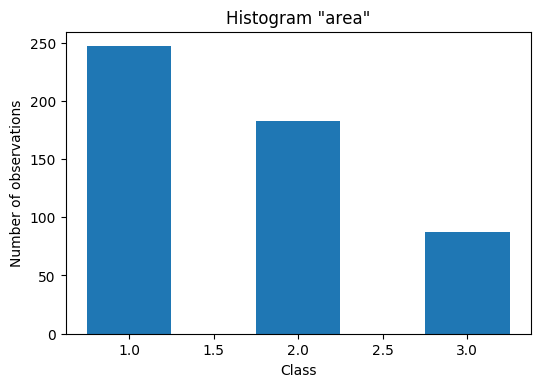

In [10]:
# Label the data as 3 classes

label = np.zeros(517)
y = np.zeros(3)
area = original_data.iloc[:,12]

for i in range(len(area)):
    if area[i] == 0:
        label[i] = 0
        y[0]+=1
    elif area[i] > 11:
        label[i] = 2
        y[2]+=1
    else:
        label[i] = 1
        y[1]+=1
x = np.arange(3) + 1

plt.bar(x,y,width=.5)
plt.title("Histogram \"area\"")
plt.xlabel("Class")
plt.ylabel("Number of observations")
#Show in plotly:
#import plotly.plotly as py
#numpy_plot = plt.gcf()
#plot_url = py.plot_mpl(numpy_plot, filename='Label')

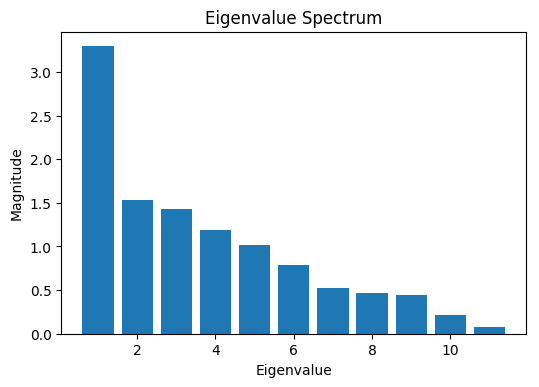

In [11]:
# Estimate covariance matrix C

#Remove area
data = final_data.drop(final_data.index[len(final_data) - 1])

#Remove rain, for 99% data rain = 0
data = data.drop(data.index[len(data) - 1])

N = data.shape[1]
C = np.dot(data,np.transpose(data))/N
eigen_values, eigen_vectors = LA.eig(C)
C_tilde = np.diag(eigen_values)
idx = eigen_values.argsort()[::-1]   
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:,idx]
x = np.arange(len(data))

plt.bar(x+1, eigen_values)
plt.title("Eigenvalue Spectrum")
plt.xlabel("Eigenvalue")
plt.ylabel("Magnitude")
#Show in plotly:
#import plotly.plotly as py
#numpy_plot = plt.gcf()
#plot_url = py.plot_mpl(numpy_plot, filename='Eigenvalue')

[ 0.30031429  0.44034744  0.57060657  0.67895889  0.77119015  0.84297791
  0.89123888  0.9332761   0.97328368  0.99311224  1.        ]


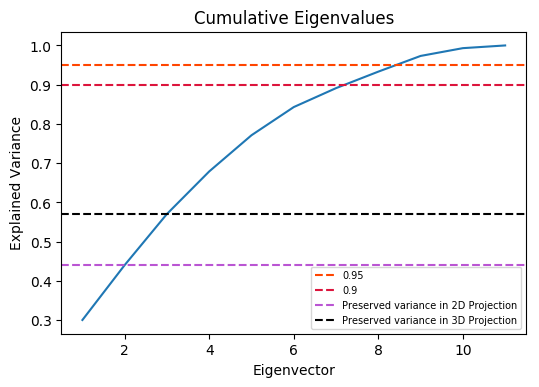

In [12]:
cumulative = np.cumsum(eigen_values)/np.sum(eigen_values)
print cumulative
plt.plot(x+1, cumulative)
plt.title("Cumulative Eigenvalues")
plt.xlabel("Eigenvector")
plt.ylabel("Explained Variance")
#plt.grid(True)
plt.axhline(y = .95, linewidth=1.5, color = 'orangered',linestyle="--", label = '0.95')
plt.axhline(y = .9, linewidth=1.5, color = 'crimson',linestyle="--", label = '0.9')
plt.axhline(y = cumulative[1], linewidth=1.5, color = 'mediumorchid',linestyle="--", label = 'Preserved variance in 2D Projection')
plt.axhline(y = cumulative[2], linewidth=1.5, color = 'black',linestyle="--", label = 'Preserved variance in 3D Projection')

plt.legend(loc = 'lower right',prop={'size':7})
plt.show()

#Show in plotly:
#import plotly.plotly as py
#numpy_plot = plt.gcf()
#plot_url = py.plot_mpl(numpy_plot, filename='numpy-bins')

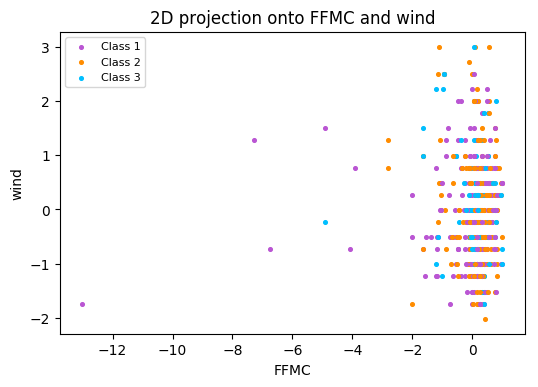

In [13]:
#Projection on FFMC and wind speed
FFMC = final_data.iloc[4,:]
wind = final_data.iloc[10,:]
for i in np.array([2,472,484]):
    if label[i] == 0:
        plt.scatter(FFMC[i], wind[i], color='mediumorchid', label = 'Class 1', s = 7)
    elif label[i] == 1:
        plt.scatter(FFMC[i], wind[i], color='darkorange', label = 'Class 2', s = 7)
    else:
        plt.scatter(FFMC[i], wind[i], color='deepskyblue', label = 'Class 3', s = 7)
for i in range(517):
    if label[i] == 0:
        plt.scatter(FFMC[i], wind[i], color='mediumorchid', s = 7)
    elif label[i] == 1:
        plt.scatter(FFMC[i], wind[i], color='darkorange', s = 7)
    else:
        plt.scatter(FFMC[i], wind[i], color='deepskyblue', s = 7)
plt.legend(loc = 'upper left',prop={'size':8})
plt.title("2D projection onto FFMC and wind")
plt.xlabel("FFMC")
plt.ylabel("wind")
plt.show()
#Show in plotly:
#import plotly.plotly as py
#numpy_plot = plt.gcf()
#plot_url = py.plot_mpl(numpy_plot, filename='numpy-bins')

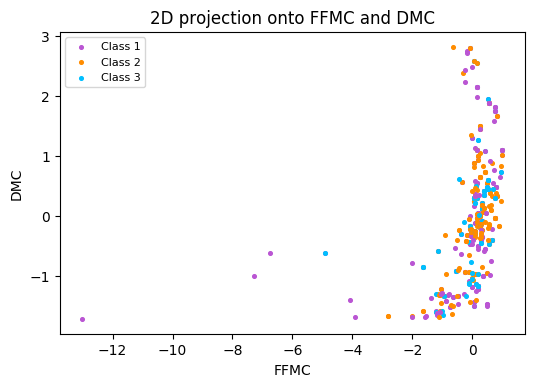

In [14]:
#Projection on FFMC and wind speed
FFMC = final_data.iloc[4,:]
DMC = final_data.iloc[5,:]
for i in np.array([2,472,484]):
    if label[i] == 0:
        plt.scatter(FFMC[i], DMC[i], color='mediumorchid', label = 'Class 1', s = 7)
    elif label[i] == 1:
        plt.scatter(FFMC[i], DMC[i], color='darkorange', label = 'Class 2', s = 7)
    else:
        plt.scatter(FFMC[i], DMC[i], color='deepskyblue', label = 'Class 3', s = 7)
for i in range(517):
    if label[i] == 0:
        plt.scatter(FFMC[i], DMC[i], color='mediumorchid', s = 7)
    elif label[i] == 1:
        plt.scatter(FFMC[i], DMC[i], color='darkorange', s = 7)
    else:
        plt.scatter(FFMC[i], DMC[i], color='deepskyblue', s = 7)
plt.legend(loc = 'upper left',prop={'size':8})
plt.title("2D projection onto FFMC and DMC")
plt.xlabel("FFMC")
plt.ylabel("DMC")
plt.show()
#Show in plotly:
#import plotly.plotly as py
#numpy_plot = plt.gcf()
#plot_url = py.plot_mpl(numpy_plot, filename='numpy-bins')

(3, 517)
(7, 517)


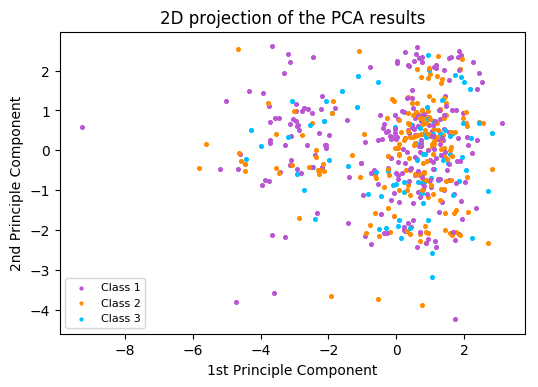

In [15]:
V = eigen_vectors[:,:3]
V_ = eigen_vectors[:,:7]
X_tilde = np.dot(V.transpose(), data)
X_tilde_ = np.dot(V_.transpose(), data)

print X_tilde.shape
print X_tilde_.shape
for i in np.array([511,512,513]):
    if label[i] == 0:
        plt.scatter(X_tilde[0,i],X_tilde[1,i], color='mediumorchid',label = 'Class 1',s = 4)
    elif label[i] == 1:
        plt.scatter(X_tilde[0,i],X_tilde[1,i], color='darkorange',label = 'Class 2',s = 4)
    else:
        plt.scatter(X_tilde[0,i],X_tilde[1,i], color='deepskyblue',label = 'Class 3', s = 4)
for i in range(517):
    if label[i] == 0:
        plt.scatter(X_tilde[0,i],X_tilde[1,i], color='mediumorchid',s = 7)
    elif label[i] == 1:
        plt.scatter(X_tilde[0,i],X_tilde[1,i], color='darkorange',s = 7)
    else:
        plt.scatter(X_tilde[0,i],X_tilde[1,i], color='deepskyblue',s = 7)
plt.legend(loc = 'lower left',prop={'size':8})
plt.title("2D projection of the PCA results")
plt.xlabel("1st Principle Component")
plt.ylabel("2nd Principle Component")
plt.show()


(3, 517)


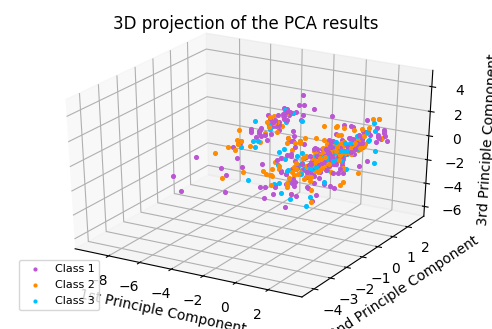

In [16]:
V = eigen_vectors[:,:3]
X_tilde = np.dot(V.transpose(), data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

print X_tilde.shape
for i in np.array([511,512,513]):
    if label[i] == 0:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='mediumorchid',label = 'Class 1',s = 4)
    elif label[i] == 1:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='darkorange',label = 'Class 2',s = 4)
    else:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='deepskyblue',label = 'Class 3', s = 4)
for i in range(517):
    if label[i] == 0:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='mediumorchid',s = 7)
    elif label[i] == 1:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='darkorange',s = 7)
    else:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='deepskyblue',s = 7)
plt.legend(loc = 'lower left',prop={'size':8})
ax.set_title("3D projection of the PCA results")
ax.set_xlabel("1st Principle Component")
ax.set_ylabel("2nd Principle Component")
ax.set_zlabel("3rd Principle Component")
plt.show()


In [24]:
som = MiniSom(20,20,3, sigma=0.1, learning_rate=0.1) # initialization of 6x6 SOM
#som.random_weights_init(data)
print "Training..."
som.train_random(list(X_tilde.transpose()), 400) #trains the SOM with 2 iterations（Convert df to list）
print "...ready!"

Training...
...ready!


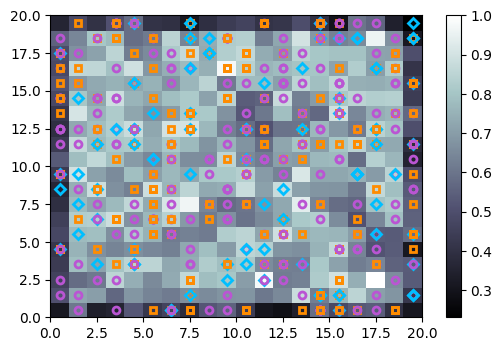

In [25]:
#Plot som
bone()
pcolor(som.distance_map().T) # plotting the distance map as background
colorbar()

# use different colors and markers for each label
markers = ['o','s','D']
colors = ['mediumorchid','darkorange','deepskyblue']
for cnt,xx in enumerate(X_tilde.transpose()):
    w = som.winner(xx) # getting the winner
    # place a marker on the winning position for the sample xx
    plot(w[0]+.5,w[1]+.5,markers[label[cnt].astype(np.int64)],markerfacecolor='None',
         markeredgecolor=colors[label[cnt].astype(np.int64)],markersize=5,markeredgewidth=2)

axis([0,20,0,20])
show() # show the figure

In [ ]:
##############################################   Clustering   ########################################################

In [27]:
quan_error = np.zeros(6)
quan_error_ = np.zeros(6)

[ 4356.59019729     0.             0.             0.             0.             0.        ]


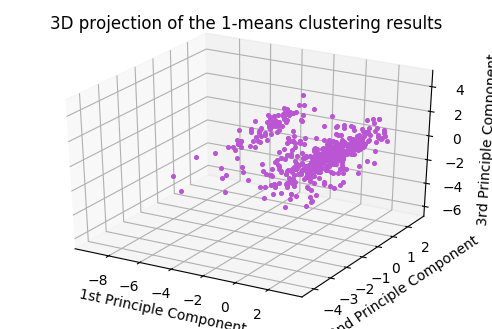

In [28]:
# cluster = 1
data_t = data.transpose()
kmeans = KMeans(n_clusters=1, random_state=0).fit(data_t)
labels =  kmeans.labels_
kmeans.predict([data_t.iloc[0,:],data_t.iloc[1,:]])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(517):
    quan_error[0] += np.sum(np.abs(data_t.iloc[i,:] - kmeans.cluster_centers_[labels[i]]))

print quan_error


for i in range(517):
    if labels[i] == 0:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='mediumorchid',s = 7)
    elif labels[i] == 1:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='darkorange',s = 7)
    else:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='deepskyblue',s = 7)
#plt.legend(loc = 'lower left',prop={'size':8})
ax.set_title("3D projection of the 1-means clustering results")
ax.set_xlabel("1st Principle Component")
ax.set_ylabel("2nd Principle Component")
ax.set_zlabel("3rd Principle Component")
plt.show()


(3, 517)


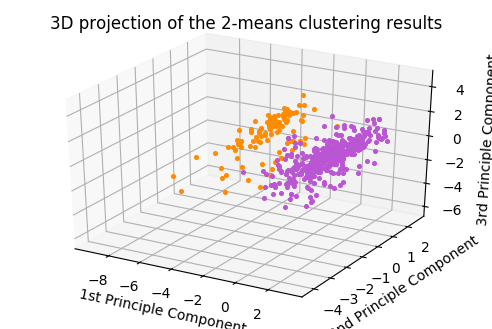

In [29]:
# cluster = 2
data_t = data.transpose()
kmeans = KMeans(n_clusters=2, random_state=0).fit(data_t)
labels =  kmeans.labels_
kmeans.predict([data_t.iloc[0,:],data_t.iloc[1,:]])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(517):
    quan_error[1] += np.sum(np.abs(data_t.iloc[i,:] - kmeans.cluster_centers_[labels[i]]))

print X_tilde.shape
for i in range(517):
    if labels[i] == 0:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='mediumorchid',s = 7)
    elif labels[i] == 1:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='darkorange',s = 7)
    else:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='deepskyblue',s = 7)
#plt.legend(loc = 'lower left',prop={'size':8})
ax.set_title("3D projection of the 2-means clustering results")
ax.set_xlabel("1st Principle Component")
ax.set_ylabel("2nd Principle Component")
ax.set_zlabel("3rd Principle Component")
plt.show()


[ 1311.1752046     0.            0.            0.            0.            0.       ]


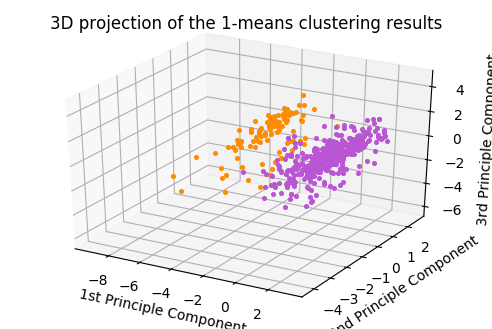

In [30]:
# cluster = 2 for X_tilde_
X_tilde_t = X_tilde.transpose()
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_tilde_t)
labels_ =  kmeans.labels_
kmeans.predict([X_tilde_t[0,:],X_tilde_t[1,:]])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(517):
    quan_error_[0] += np.sum(np.abs(X_tilde_t[i,:] - kmeans.cluster_centers_[labels_[i]]))

print quan_error_


for i in range(517):
    if labels_[i] == 0:
        ax.scatter(X_tilde_[0,i],X_tilde_[1,i], X_tilde_[2,i], color='mediumorchid',s = 7)
    elif labels_[i] == 1:
        ax.scatter(X_tilde_[0,i],X_tilde_[1,i], X_tilde_[2,i], color='darkorange',s = 7)
    else:
        ax.scatter(X_tilde_[0,i],X_tilde_[1,i], X_tilde_[2,i], color='deepskyblue',s = 7)
#plt.legend(loc = 'lower left',prop={'size':8})
ax.set_title("3D projection of the 1-means clustering results")
ax.set_xlabel("1st Principle Component")
ax.set_ylabel("2nd Principle Component")
ax.set_zlabel("3rd Principle Component")
plt.show()


[ 4356.59019729  3665.41785007  3426.70170733     0.             0.             0.        ]
(3, 517)


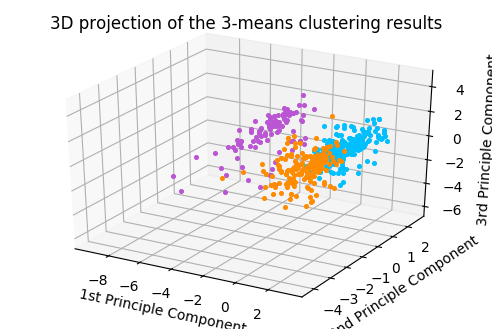

In [59]:
# cluster = 3
data_t = data.transpose()
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_t)
labels =  kmeans.labels_
kmeans.predict([data_t.iloc[0,:],data_t.iloc[1,:]])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for i in range(517):
    quan_error[2] += np.sum(np.abs(data_t.iloc[i,:] - kmeans.cluster_centers_[labels[i]]))
    
print quan_error

print X_tilde.shape
for i in range(517):
    if labels[i] == 0:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='mediumorchid',s = 7)
    elif labels[i] == 1:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='darkorange',s = 7)
    else:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='deepskyblue',s = 7)
#plt.legend(loc = 'lower left',prop={'size':8})
ax.set_title("3D projection of the 3-means clustering results")
ax.set_xlabel("1st Principle Component")
ax.set_ylabel("2nd Principle Component")
ax.set_zlabel("3rd Principle Component")
plt.show()

In [69]:
som = MiniSom(10,10,3, sigma=0.1, learning_rate=0.1) # initialization of 6x6 SOM
#som.random_weights_init(data)
print "Training..."
som.train_random(list(X_tilde.transpose()), 200) #trains the SOM with 2 iterations（Convert df to list）
print "...ready!"

Training...
...ready!


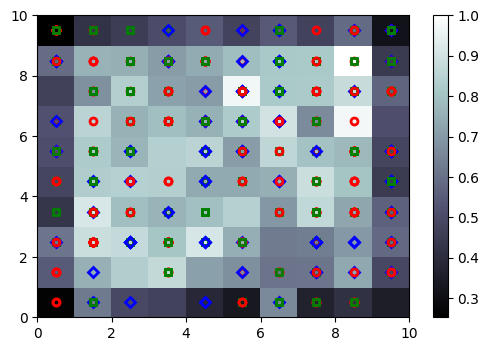

In [75]:
#Plot som
bone()
pcolor(som.distance_map().T) # plotting the distance map as background
colorbar()

# use different colors and markers for each label
markers = ['o','s','D']
colors = ['r','g','b']
for cnt,xx in enumerate(X_tilde.transpose()):
    w = som.winner(xx) # getting the winner
    # place a marker on the winning position for the sample xx
    plot(w[0]+.5,w[1]+.5,markers[label[cnt].astype(np.int64)],markerfacecolor='None',
         markeredgecolor=colors[label[cnt].astype(np.int64)],markersize=5,markeredgewidth=2)

axis([0,10,0,10])
show() # show the figure

[ 2455.0055844     0.            0.            0.            0.            0.       ]


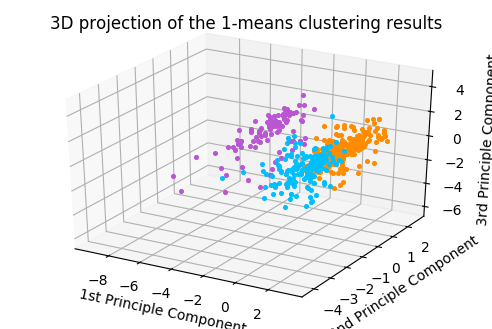

In [60]:
# cluster = 3 for X_tilde_
X_tilde_t = X_tilde_.transpose()
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_tilde_t)
labels_ =  kmeans.labels_
kmeans.predict([X_tilde_t[0,:],X_tilde_t[1,:]])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(517):
    quan_error_[0] += np.sum(np.abs(X_tilde_t[i,:] - kmeans.cluster_centers_[labels_[i]]))

print quan_error_


for i in range(517):
    if labels_[i] == 0:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='deepskyblue',s = 7)
    elif labels_[i] == 1:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='darkorange',s = 7)
    else:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='mediumorchid',s = 7)
#plt.legend(loc = 'lower left',prop={'size':8})
ax.set_title("3D projection of the 1-means clustering results")
ax.set_xlabel("1st Principle Component")
ax.set_ylabel("2nd Principle Component")
ax.set_zlabel("3rd Principle Component")
plt.show()


[ 4356.59019729  3665.41785007  3426.70170733  3285.3053288      0.             0.        ]
(3, 517)


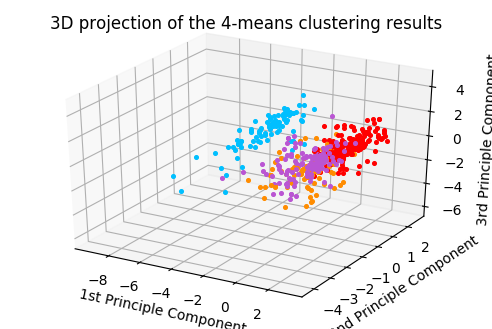

In [61]:
# cluster = 4
data_t = data.transpose()
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_t)
labels =  kmeans.labels_
kmeans.predict([data_t.iloc[0,:],data_t.iloc[1,:]])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(517):
    quan_error[3] += np.sum(np.abs(data_t.iloc[i,:] - kmeans.cluster_centers_[labels[i]]))
print quan_error

print X_tilde.shape
for i in range(517):
    if labels[i] == 0:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='mediumorchid',s = 7)
    elif labels[i] == 1:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='darkorange',s = 7)
    elif labels[i] == 2:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='red',s = 7)
    else:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='deepskyblue',s = 7)
#plt.legend(loc = 'lower left',prop={'size':8})
ax.set_title("3D projection of the 4-means clustering results")
ax.set_xlabel("1st Principle Component")
ax.set_ylabel("2nd Principle Component")
ax.set_zlabel("3rd Principle Component")
plt.show()

[ 4356.59019729  3665.41785007  3426.70170733  3285.3053288   3241.13002553
     0.        ]
(3, 517)


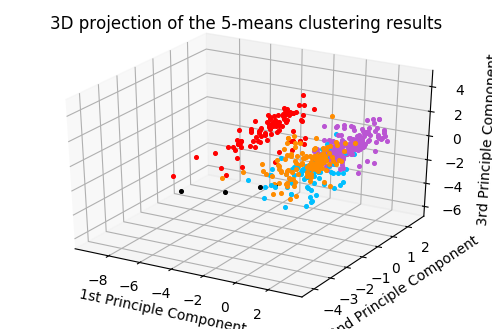

In [62]:
# cluster = 5
data_t = data.transpose()
kmeans = KMeans(n_clusters=5, random_state=0).fit(data_t)
labels =  kmeans.labels_
kmeans.predict([data_t.iloc[0,:],data_t.iloc[1,:]])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(517):
    quan_error[4] += np.sum(np.abs(data_t.iloc[i,:] - kmeans.cluster_centers_[labels[i]]))
print quan_error

print X_tilde.shape
for i in range(517):
    if labels[i] == 0:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='mediumorchid',s = 7)
    elif labels[i] == 1:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='darkorange',s = 7)
    elif labels[i] == 2:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='red',s = 7)
    elif labels[i] == 3:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='black',s = 7)
    else:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='deepskyblue',s = 7)
#plt.legend(loc = 'lower left',prop={'size':8})
ax.set_title("3D projection of the 5-means clustering results")
ax.set_xlabel("1st Principle Component")
ax.set_ylabel("2nd Principle Component")
ax.set_zlabel("3rd Principle Component")
plt.show()

[ 4356.59019729  3665.41785007  3426.70170733  3285.3053288   3241.13002553
  3118.50575057]
(3, 517)


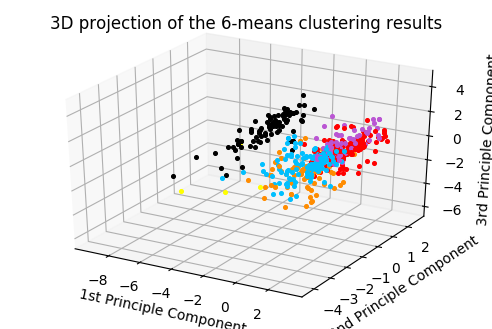

In [63]:
# cluster = 6
data_t = data.transpose()
kmeans = KMeans(n_clusters=6, random_state=0).fit(data_t)
labels =  kmeans.labels_
kmeans.predict([data_t.iloc[0,:],data_t.iloc[1,:]])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(517):
    quan_error[5] += np.sum(np.abs(data_t.iloc[i,:] - kmeans.cluster_centers_[labels[i]]))
print quan_error

print X_tilde.shape
for i in range(517):
    if labels[i] == 0:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='mediumorchid',s = 7)
    elif labels[i] == 1:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='darkorange',s = 7)
    elif labels[i] == 2:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='red',s = 7)
    elif labels[i] == 3:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='black',s = 7)
    elif labels[i] == 4:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='yellow',s = 7)
    else:
        ax.scatter(X_tilde[0,i],X_tilde[1,i], X_tilde[2,i], color='deepskyblue',s = 7)
#plt.legend(loc = 'lower left',prop={'size':8})
ax.set_title("3D projection of the 6-means clustering results")
ax.set_xlabel("1st Principle Component")
ax.set_ylabel("2nd Principle Component")
ax.set_zlabel("3rd Principle Component")
plt.show()

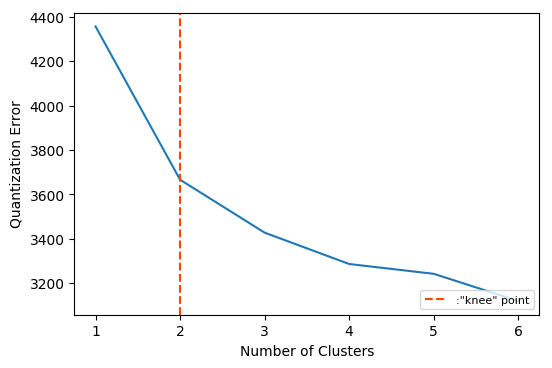

In [64]:
plt.plot(np.arange(6)+1, quan_error)

plt.xlabel("Number of Clusters")
plt.ylabel("Quantization Error")
plt.axvline(x = 2, linewidth=1.5, color = 'orangered',linestyle="--", label = ':"knee" point')
plt.legend(loc = 'lower right',prop={'size':8})
plt.show()

In [65]:
som = MiniSom(10,10,11, sigma=0.1, learning_rate=0.1) # initialization of 6x6 SOM
#som.random_weights_init(data)
print "Training..."
som.train_random(list(data), 20000) #trains the SOM with 2 iterations（Convert df to list）
print "...ready!"

Training...
...ready!


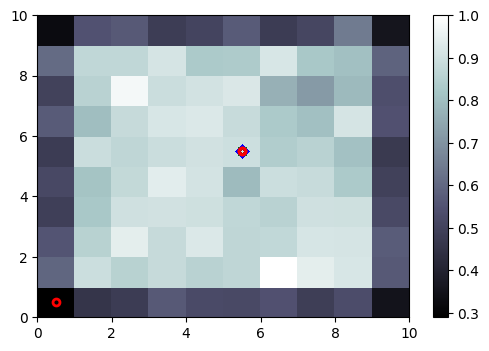

In [66]:
#Plot som
bone()
pcolor(som.distance_map().T) # plotting the distance map as background
colorbar()

# use different colors and markers for each label
markers = ['o','s','D']
colors = ['r','g','b']
for cnt,xx in enumerate(data):
    w = som.winner(xx) # getting the winner
    # place a marker on the winning position for the sample xx
    plot(w[0]+.5,w[1]+.5,markers[label[cnt].astype(np.int64)],markerfacecolor='None',
         markeredgecolor=colors[label[cnt].astype(np.int64)],markersize=5,markeredgewidth=2)

axis([0,10,0,10])
show() # show the figure

In [ ]:
#Plot som of 3-clustering 
bone()
pcolor(som.distance_map().T) # plotting the distance map as background
colorbar()

# use different colors and markers for each label
markers = ['o','s','d']
colors = ['r','g','b']
for cnt,xx in enumerate(data):
    w = som.winner(xx) # getting the winner
    # place a marker on the winning position for the sample xx
    plot(w[0]+.5,w[1]+.5,markers[labels[cnt].astype(np.int64)],markerfacecolor='None',
         markeredgecolor=colors[labels[cnt].astype(np.int64)],markersize=5,markeredgewidth=2)

axis([0,10,0,10])
show() # show the figure

In [ ]:
#############################################   Question2 ISI  ########################################################

In [ ]:
# Label the data as 3 classes

label = np.zeros(517)
y = np.zeros(3)
isi = original_data.iloc[:,7]

for i in range(len(isi)):
    if isi[i] < 3:
        label[i] = 0
        y[0]+=1
    elif isi[i] > 5:
        label[i] = 2
        y[2]+=1
    else:
        label[i] = 1
        y[1]+=1
        
x = np.arange(3) + 1

plt.bar(x,y,width=.5)
plt.title("Histogram \"ISI\"")
plt.xlabel("Class")
plt.ylabel("Number of observations")
#Show in plotly:
#import plotly.plotly as py
#numpy_plot = plt.gcf()
#plot_url = py.plot_mpl(numpy_plot, filename='Label')

In [ ]:
# Estimate covariance matrix C

#Remove area
data = final_data.drop(final_data.index[len(final_data) - 1])

#Remove rain, for 99% data rain = 0
data = data.drop(data.index[len(data) - 1])

#Remove Initial spread index
data = data.drop(data.index[7])
N = data.shape[1]
C = np.dot(data,np.transpose(data))/N

In [ ]:
eigen_values, eigen_vectors = LA.eig(C)
idx = eigen_values.argsort()[::-1]   
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:,idx]

In [ ]:
C_tilde = np.diag(eigen_values)
x = np.arange(len(data))
plt.bar(x+1, eigen_values)
plt.title("Eigenvalue Spectrum")
plt.xlabel("Eigenvalue")
plt.ylabel("Magnitude")
#Show in plotly:
#import plotly.plotly as py
#numpy_plot = plt.gcf()
#plot_url = py.plot_mpl(numpy_plot, filename='Eigenvalue')

In [ ]:
cumulative = np.cumsum(eigen_values)/np.sum(eigen_values)
print cumulative
plt.plot(x+1, cumulative)
plt.title("Cumulative Eigenvalues")
plt.xlabel("Eigenvector")
plt.ylabel("Explained Variance")
#plt.grid(True)
plt.axhline(y = .95, linewidth=1.5, color = 'orangered',linestyle="--", label = '0.95')
plt.axhline(y = .9, linewidth=1.5, color = 'crimson',linestyle="--", label = '0.9')
plt.axhline(y = cumulative[1], linewidth=1.5, color = 'mediumorchid',linestyle="--", label = 'Preserved variance in 2D Projection')
plt.legend(loc = 'lower right',prop={'size':8})
plt.show()

#Show in plotly:
#import plotly.plotly as py
#numpy_plot = plt.gcf()
#plot_url = py.plot_mpl(numpy_plot, filename='numpy-bins')

In [ ]:
V = eigen_vectors[:,:2]
X_tilde = np.dot(V.transpose(), data)

print X_tilde.shape
for i in np.array([411,472,1]):
    if label[i] == 0:
        plt.scatter(X_tilde[0,i],X_tilde[1,i], color='mediumorchid',label = 'Class 1',s = 4)
    elif label[i] == 1:
        plt.scatter(X_tilde[0,i],X_tilde[1,i], color='darkorange',label = 'Class 2',s = 4)
    else:
        plt.scatter(X_tilde[0,i],X_tilde[1,i], color='deepskyblue',label = 'Class 3', s = 4)
for i in range(517):
    if label[i] == 0:
        plt.scatter(X_tilde[0,i],X_tilde[1,i], color='mediumorchid',s = 7)
    elif label[i] == 1:
        plt.scatter(X_tilde[0,i],X_tilde[1,i], color='darkorange',s = 7)
    else:
        plt.scatter(X_tilde[0,i],X_tilde[1,i], color='deepskyblue',s = 7)
plt.legend(loc = 'lower left',prop={'size':8})
plt.title("2D projection of the PCA results")
plt.xlabel("1st Principle Component")
plt.ylabel("2nd Principle Component")
plt.show()


In [ ]:
#Projection on FFMC and wind speed
FFMC = final_data.iloc[4,:]
wind = final_data.iloc[10,:]
for i in np.array([411,472,1]):
    if label[i] == 0:
        plt.scatter(FFMC[i], wind[i], color='mediumorchid', label = 'Class 1', s = 7)
    elif label[i] == 1:
        plt.scatter(FFMC[i], wind[i], color='darkorange', label = 'Class 2', s = 7)
    else:
        plt.scatter(FFMC[i], wind[i], color='deepskyblue', label = 'Class 3', s = 7)
for i in range(517):
    if label[i] == 0:
        plt.scatter(FFMC[i], wind[i], color='mediumorchid', s = 7)
    elif label[i] == 1:
        plt.scatter(FFMC[i], wind[i], color='darkorange', s = 7)
    else:
        plt.scatter(FFMC[i], wind[i], color='deepskyblue', s = 7)
plt.legend(loc = 'upper left',prop={'size':8})
plt.title("2D projection onto FFMC and wind")
plt.xlabel("FFMC")
plt.ylabel("wind")
plt.show()
#Show in plotly:
#import plotly.plotly as py
#numpy_plot = plt.gcf()
#plot_url = py.plot_mpl(numpy_plot, filename='numpy-bins')

In [ ]:
#############################################   Question3 DC  #########################################################


In [ ]:
# Label the data as 3 classes

label = np.zeros(517)
y = np.zeros(3)
dc = original_data.iloc[:,6]

for i in range(len(dc)):
    if dc[i] < 300:
        label[i] = 0
        y[0]+=1
    elif dc[i] > 500:
        label[i] = 2
        y[2]+=1
    else:
        label[i] = 1
        y[1]+=1
        
x = np.arange(3) + 1

plt.bar(x,y,width=.5)
plt.title("Histogram \"DC\"")
plt.xlabel("Class")
plt.ylabel("Number of observations")
#Show in plotly:
#import plotly.plotly as py
#numpy_plot = plt.gcf()
#plot_url = py.plot_mpl(numpy_plot, filename='Label')

In [ ]:
# Estimate covariance matrix C

#Remove area
data = final_data.drop(final_data.index[len(final_data) - 1])

#Remove rain, for 99% data rain = 0
data = data.drop(data.index[len(data) - 1])

#Remove DC
data = data.drop(data.index[6])
N = data.shape[1]
C = np.dot(data,np.transpose(data))/N

In [ ]:
eigen_values, eigen_vectors = LA.eig(C)
idx = eigen_values.argsort()[::-1]   
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[:,idx]

In [ ]:
C_tilde = np.diag(eigen_values)
x = np.arange(len(data))
plt.bar(x+1, eigen_values)
plt.title("Eigenvalue Spectrum")
plt.xlabel("Eigenvalue")
plt.ylabel("Magnitude")
#Show in plotly:
#import plotly.plotly as py
#numpy_plot = plt.gcf()
#plot_url = py.plot_mpl(numpy_plot, filename='Eigenvalue')

In [ ]:
cumulative = np.cumsum(eigen_values)/np.sum(eigen_values)
print cumulative
plt.plot(x+1, cumulative)
plt.title("Cumulative Eigenvalues")
plt.xlabel("Eigenvector")
plt.ylabel("Explained Variance")
#plt.grid(True)
plt.axhline(y = .95, linewidth=1.5, color = 'orangered',linestyle="--", label = '0.95')
plt.axhline(y = .9, linewidth=1.5, color = 'crimson',linestyle="--", label = '0.9')
plt.axhline(y = cumulative[1], linewidth=1.5, color = 'mediumorchid',linestyle="--", label = 'Preserved variance in 2D Projection')
plt.legend(loc = 'lower right',prop={'size':8})
plt.show()

#Show in plotly:
#import plotly.plotly as py
#numpy_plot = plt.gcf()
#plot_url = py.plot_mpl(numpy_plot, filename='numpy-bins')

In [ ]:
V = eigen_vectors[:,:2]
X_tilde = np.dot(V.transpose(), data)

print X_tilde.shape
for i in np.array([511,512,513]):
    if label[i] == 0:
        plt.scatter(X_tilde[0,i],X_tilde[1,i], color='mediumorchid',label = 'Class 1',s = 4)
    elif label[i] == 1:
        plt.scatter(X_tilde[0,i],X_tilde[1,i], color='darkorange',label = 'Class 2',s = 4)
    else:
        plt.scatter(X_tilde[0,i],X_tilde[1,i], color='deepskyblue',label = 'Class 3', s = 4)
for i in range(517):
    if label[i] == 0:
        plt.scatter(X_tilde[0,i],X_tilde[1,i], color='mediumorchid',s = 7)
    elif label[i] == 1:
        plt.scatter(X_tilde[0,i],X_tilde[1,i], color='darkorange',s = 7)
    else:
        plt.scatter(X_tilde[0,i],X_tilde[1,i], color='deepskyblue',s = 7)
plt.legend(loc = 'lower left',prop={'size':8})
plt.title("2D projection of the PCA results")
plt.xlabel("1st Principle Component")
plt.ylabel("2nd Principle Component")
plt.show()


In [ ]:
#Projection on FFMC and DMC
Coordinate = data.iloc[4:6,:].as_matrix()
print Coordinate
for i in np.array([511,512,513]):
    if label[i] == 0:
        plt.scatter(Coordinate[0,i],Coordinate[1,i], color='mediumorchid',label = 'Class 1',s = 4)
    elif label[i] == 1:
        plt.scatter(Coordinate[0,i],Coordinate[1,i], color='darkorange',label = 'Class 2',s = 4)
    else:
        plt.scatter(Coordinate[0,i],Coordinate[1,i], color='deepskyblue',label = 'Class 3', s = 4)
for i in range(517):
    if label[i] == 0:
        plt.scatter(Coordinate[0,i],Coordinate[1,i], color='mediumorchid',s = 7)
    elif label[i] == 1:
        plt.scatter(Coordinate[0,i],Coordinate[1,i], color='darkorange',s = 7)
    else:
        plt.scatter(Coordinate[0,i],Coordinate[1,i], color='deepskyblue',s = 7)
plt.legend(loc = 'lower left',prop={'size':8})
plt.title("2D projection onto FFMC and DMC")
plt.xlabel("FFMC")
plt.ylabel("DMC")
plt.show()

In [ ]:
###########################################  Finish Project  ##########################################################







In [ ]:
##########################################  Test Area Begins  #########################################################

In [ ]:
#Projection on FFMC and DMC
Coordinate = data.iloc[9,:]
area = data.iloc[6,:]
for i in np.array([511,512,513]):
    if label[i] == 0:
        plt.scatter(Coordinate[i],area[i], color='mediumorchid',label = 'Class 1',s = 7)
    elif label[i] == 1:
        plt.scatter(Coordinate[i],area[i], color='darkorange',label = 'Class 2',s = 7)
    else:
        plt.scatter(Coordinate[i],area[i], color='deepskyblue',label = 'Class 3', s = 7)
for i in range(517):
    if label[i] == 0:
        plt.scatter(Coordinate[i],area[i], color='mediumorchid',s = 7)
    elif label[i] == 1:
        plt.scatter(Coordinate[i],area[i], color='darkorange',s = 7)
    else:
        plt.scatter(Coordinate[i],area[i], color='deepskyblue',s = 7)
plt.legend(loc = 'upper left',prop={'size':8})
plt.title("2D projection onto FFMC and DMC")
plt.xlabel("FFMC")
plt.ylabel("DMC")
#plt.show()
#Show in plotly:
import plotly.plotly as py
numpy_plot = plt.gcf()
plot_url = py.plot_mpl(numpy_plot, filename='numpy-bins')

In [ ]:
Coordinate = data.iloc[:2,:].as_matrix()
print Coordinate
for i in np.array([511,512,513]):
    if label[i] == 0:
        plt.scatter(Coordinate[0,i],Coordinate[1,i], color='mediumorchid',label = 'Class 1',s = 4)
    elif label[i] == 1:
        plt.scatter(Coordinate[0,i],Coordinate[1,i], color='darkorange',label = 'Class 2',s = 4)
    else:
        plt.scatter(Coordinate[0,i],Coordinate[1,i], color='deepskyblue',label = 'Class 3', s = 4)
for i in range(517):
    if label[i] == 0:
        plt.scatter(Coordinate[0,i],Coordinate[1,i], color='mediumorchid',s = 7)
    elif label[i] == 1:
        plt.scatter(Coordinate[0,i],Coordinate[1,i], color='darkorange',s = 7)
    else:
        plt.scatter(Coordinate[0,i],Coordinate[1,i], color='deepskyblue',s = 7)
plt.legend(loc = 'lower left',prop={'size':8})
plt.title("2D projection onto X and Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
'''area = original_data.iloc[:,12] + 1
area = np.log(area) 
#a = np.array([0,0]) + np.arange(16)*0.5
a = np.array([0,0])
b = np.arange(16)*0.5
print a , b
#plt.hist(area,bins=np.arange(16)*0.5, edgecolor='black')
plt.hist(area,bins=[0, 0.001,0.5,  1.,   1.5 , 2. ,  2.5 , 3. ,  3.5 , 4. ,  4.5 , 5. ,  5.5 , 6. ,  6.5 , 7.,
  7.5], edgecolor='black')
plt.title("Ln(area+1)",fontweight="bold")
plt.xlabel("Ln(area+1)")
plt.ylabel("Frequency")
plt.axvline(x=1.5,linewidth=0.5, color='darkorange',linestyle="--" )'''
#ln(area + 1)